# Identify and recommend the most valuable costumer to target
## Outiline of problem:
1. Sprocket Central Pty Ltd is a company that specializes in high-quality bikes and accessible cycling accessories to riders. 
2. Their marketing team is looking to boost business by analyzing their existing customer dataset to determine customer trends and behavior. 
3. Using the existing 3 datasets, the goal is to recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.


## Data quality assessment and Clean-Up

__Accuracy__ : DOB: inaccurate | Age: missing | Profit: missing <br>
__Completeness__: Job title: blanks | Customer id: incomplete | Online orders , Brand: blanks   
__Consistency__ :Gender: inconsistent | States: inconsistent  
__Currency__: Deceased Customer: filter out  
__Relevancy__: Default column: delete | Cancelled states order: filter out  
__Validity__: List price: format | Product sold date: format  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline


In [2]:
xlsx = pd.ExcelFile('KPMG_raw_data.xlsx')

transactions = pd.read_excel(xlsx,'Transactions')
demographic = pd.read_excel(xlsx,'CustomerDemographic')
addresses = pd.read_excel(xlsx,'CustomerAddress')

transactions.head(10)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-15
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,2009-04-12
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-05
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2004-08-17


In [3]:
print(transactions.shape)
print(transactions.dtypes)

(20000, 13)
transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object


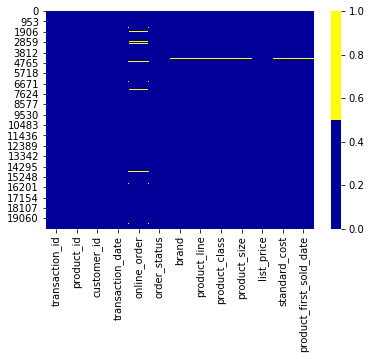

In [4]:

colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(transactions.isnull(), cmap=sns.color_palette(colours))

In [5]:
transactions.dropna(inplace=True)
print(transactions.isnull().sum().sum())
transactions=transactions.loc[transactions['order_status'] == 'Approved']
transactions.shape

0


(19273, 13)

In [6]:
print(demographic.head(10))
print(demographic.shape)
print(demographic.dtypes)



   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   
5            6            Curr  Duckhouse    Male   
6            7            Fina     Merali  Female   
7            8             Rod      Inder    Male   
8            9            Mala       Lind  Female   
9           10        Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
3                                   33 1961-10-03   
4                                   56 1977-05-13   
5                                   35 1966-09-16   
6                                    6 1976-0

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

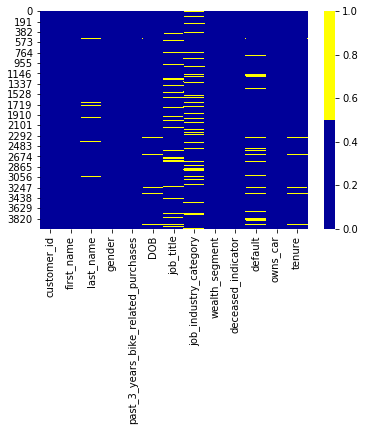

In [7]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(demographic.isnull(), cmap=sns.color_palette(colours))
demographic.isnull().sum()

In [8]:
demographic['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [9]:
demographic['gender']=demographic['gender'].replace('M','Male')
demographic['gender']=demographic['gender'].replace('F','Female')
demographic['gender']=demographic['gender'].replace('Femal','Female')
demographic['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

In [10]:
demographic.drop('default',1,inplace=True)
demographic['deceased_indicator'] = demographic.loc[demographic['deceased_indicator'] == 'N']



In [30]:
from datetime import timedelta
now = pd.Timestamp('now')
demographic['Age'] = (now - pd.to_datetime(demographic['DOB'])) // timedelta(days=365.2425)
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,1,Yes,11.0,66
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,2,Yes,16.0,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,3,Yes,15.0,66
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,4,No,7.0,59
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,5,Yes,8.0,43


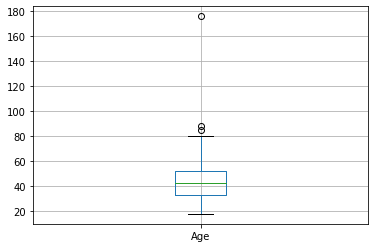

In [12]:
demographic.boxplot(column='Age')

In [13]:
demographic['Age']= demographic.loc[demographic['Age'] < 100]
demographic.dropna(subset=['DOB','Age','deceased_indicator'], inplace=True)
demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
dtype: int64

In [14]:
print(addresses.head(10))
addresses.shape

   customer_id                  address  postcode            state    country  \
0            1       060 Morning Avenue      2016  New South Wales  Australia   
1            2      6 Meadow Vale Court      2153  New South Wales  Australia   
2            4       0 Holy Cross Court      4211              QLD  Australia   
3            5      17979 Del Mar Point      2448  New South Wales  Australia   
4            6         9 Oakridge Court      3216              VIC  Australia   
5            7         4 Delaware Trail      2210  New South Wales  Australia   
6            8      49 Londonderry Lane      2650  New South Wales  Australia   
7            9          97736 7th Trail      2023  New South Wales  Australia   
8           11     93405 Ludington Park      3044              VIC  Australia   
9           12  44339 Golden Leaf Alley      4557              QLD  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3           

(3999, 6)

In [15]:
print(addresses.isnull().sum())
addresses['state'].unique()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64


array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [16]:
addresses['state']=addresses['state'].replace('New South Wales','NSW')
addresses['state']=addresses['state'].replace('Victoria','VIC')
addresses['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

## RFM ANALYSIS and customer classification
### What is RFM?
Behavioral segmentation by 3 important features:
1. Recency — number of days since the last purchase
2. Frequency — number of transactions made over a given period
3. Monetary — amount spent over a given period of time

We will be implementing the Quantile grouping for our approach.


In [17]:
# --Group data by customerID--
# Create profit column for transactions dataset
transactions['profit'] =transactions['list_price']- transactions['standard_cost']
# Create snapshot date
snapshot_date = transactions['transaction_date'].max() + timedelta(days=1)
# Grouping by CustomerID
RFM = transactions.groupby(['customer_id']).agg({
        'transaction_date': lambda x: (snapshot_date - x.max()).days,
        'product_id': 'count',
        'profit': 'sum'})
# Rename the columns 
RFM.rename(columns={'transaction_date': 'Recency',
                         'product_id': 'Frequency',
                         'profit': 'Monetary'}, inplace=True)

print(RFM.head())
RFM.shape

             Recency  Frequency  Monetary
customer_id                              
1                  8         11   3018.09
2                129          3   2226.26
3                103          7   3290.21
4                196          2    220.57
5                 17          6   2394.94


(3490, 3)

In [18]:
RFM['r_quartile'] = pd.qcut(RFM['Recency'], 4, ['4','3','2','1'] )
RFM['f_quartile'] = pd.qcut(RFM['Frequency'], 4, ['1','2','3','4'])
RFM['m_quartile'] = pd.qcut(RFM['Monetary'], 4, ['1','2','3','4'] )
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,8,11,3018.09,4,4,3
2,129,3,2226.26,1,1,2
3,103,7,3290.21,1,3,3
4,196,2,220.57,1,1,1
5,17,6,2394.94,4,3,2


In [19]:
# Concat RFM quartile values to create RFM Segments
RFM['RFM_Score'] = RFM.r_quartile.astype(str)+ RFM.f_quartile.astype(str) + RFM.m_quartile.astype(str)
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
customer_id,,,,,,,
1,8,11,3018.09,4,4,3,443
2,129,3,2226.26,1,1,2,112
3,103,7,3290.21,1,3,3,133
4,196,2,220.57,1,1,1,111
5,17,6,2394.94,4,3,2,432


In [20]:
RFM.dtypes

Recency          int64
Frequency        int64
Monetary       float64
r_quartile    category
f_quartile    category
m_quartile    category
RFM_Score       object
dtype: object

In [21]:
RFM['RFM_Score']=RFM['RFM_Score'].astype(np.float16)

RFM['RFM_Score'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    111.0
0.1    112.0
0.2    132.0
0.3    212.0
0.4    233.0
0.5    311.0
0.6    324.0
0.7    344.0
0.8    413.0
0.9    433.0
1.0    444.0
Name: RFM_Score, dtype: float64

In [22]:
#Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] ==444:
        return 'Platinum Customer'
    elif ((df['RFM_Score'] >= 433) and (df['RFM_Score'] < 444)):
        return 'Very Loyal'
    elif ((df['RFM_Score'] >= 413) and (df['RFM_Score'] < 433)):
        return 'Becoming Loyal'
    elif ((df['RFM_Score'] >= 344) and (df['RFM_Score'] < 413)):
        return 'Recent Customer'
    elif ((df['RFM_Score'] >= 324) and (df['RFM_Score'] < 344)):
        return 'Potential Customer'
    elif ((df['RFM_Score'] >= 311) and (df['RFM_Score'] < 324)):
        return 'Late Bloomer'
    elif ((df['RFM_Score'] >= 233) and (df['RFM_Score'] < 311)):
        return 'Losing customer'
    elif ((df['RFM_Score'] >= 212) and (df['RFM_Score'] < 233)):
        return 'High Risk Customer'
    elif ((df['RFM_Score'] >= 132) and (df['RFM_Score'] < 212)):
        return 'Almost Lost Customer'
    elif ((df['RFM_Score'] >= 112) and (df['RFM_Score'] < 132)):
        return 'Evasive Customer'
    else:
        return 'Lost Customer'
    
# Create a new variable RFM_Level
RFM['RFM_Level'] = RFM.apply(rfm_level, axis=1)
RFM.sort_values('RFM_Score', ascending =False, inplace=True)
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Level
customer_id,,,,,,,,
235,3,11,4685.82,4,4,4,444.0,Platinum Customer
2737,6,9,5371.57,4,4,4,444.0,Platinum Customer
2695,5,8,8104.58,4,4,4,444.0,Platinum Customer
3402,13,9,6036.19,4,4,4,444.0,Platinum Customer
2705,3,8,5470.70,4,4,4,444.0,Platinum Customer


In [23]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                     Recency Frequency Monetary      
                        mean      mean     mean count
RFM_Level                                            
Almost Lost Customer    98.9       5.1   2586.9   358
Becoming Loyal           9.8       5.3   2691.0   303
Evasive Customer       143.0       4.3   2741.8   367
High Risk Customer      66.6       4.8   2522.4   355
Late Bloomer            32.5       4.0   2069.0   355
Losing customer         64.7       7.5   4470.4   347
Lost Customer          170.2       2.6    890.8   307
Platinum Customer        8.9       9.3   5873.4   169
Potential Customer      32.9       6.8   3595.7   345
Recent Customer         20.3       6.1   3599.1   327
Very Loyal              10.0       7.1   3970.1   257


(0.0, 100.0, 0.0, 100.0)

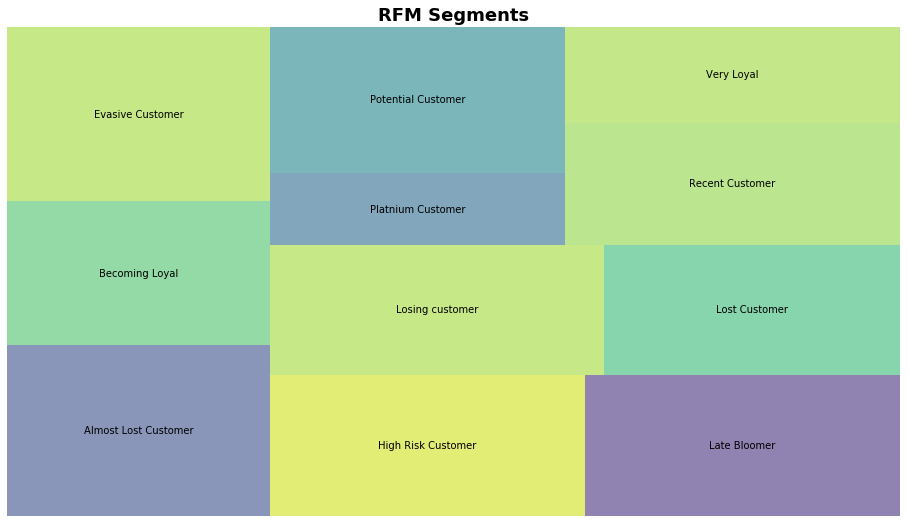

In [24]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Almost Lost Customer','Becoming Loyal','Evasive Customer',
                     'High Risk Customer','Late Bloomer', 'Losing customer',
                     'Lost Customer', 'Platnium Customer', 'Potential Customer', 'Recent Customer', 'Very Loyal'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')


<BarContainer object of 11 artists>

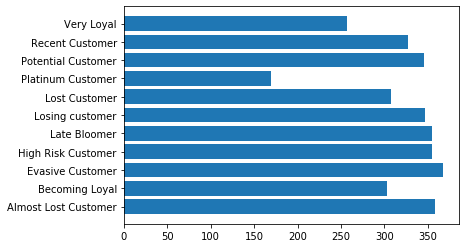

In [25]:
plt.barh(rfm_level_agg.index, rfm_level_agg['Count'])

## Scatter plot based off RFM analysis


Text(0.5, 1.0, 'Recency VS Frequency')

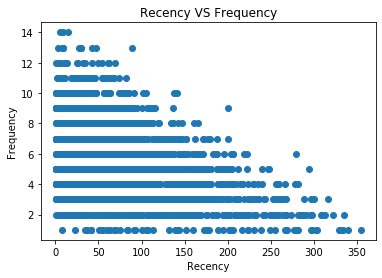

In [26]:
plt.scatter(RFM['Recency'], RFM['Frequency'])
plt.ylabel('Frequency')
plt.xlabel('Recency')
plt.title('Recency VS Frequency')

Text(0.5, 1.0, 'Recency VS Monetary')

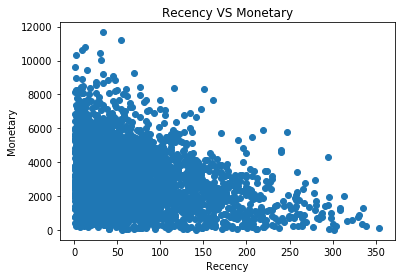

In [27]:
plt.scatter(RFM['Recency'], RFM['Monetary'])
plt.ylabel('Monetary')
plt.xlabel('Recency')
plt.title('Recency VS Monetary')

Text(0.5, 1.0, 'Frequency VS Monetary')

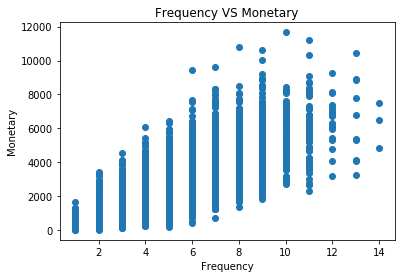

In [28]:
plt.scatter(RFM['Frequency'],RFM['Monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency VS Monetary')

## Customer target 

The __1000 customers__ would have bought __recently__ , __very frequently__ in the past and tend to __spend more__ than the other customers


In [29]:
Target = RFM.iloc[:1000,6:8]
print(Target.head())
Target.shape

             RFM_Score          RFM_Level
customer_id                              
235              444.0  Platinum Customer
2737             444.0  Platinum Customer
2695             444.0  Platinum Customer
3402             444.0  Platinum Customer
2705             444.0  Platinum Customer


(1000, 2)